In [1]:
from tensorflow.keras.utils import image_dataset_from_directory
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [4]:
train_path = "/kaggle/input/img-col/train"
test_path = "/kaggle/input/img-col/test"

In [ ]:
len(a)

In [6]:
pre = image_dataset_from_directory

In [7]:
train = pre(train_path,labels='inferred',image_size=(224,224),batch_size = 64)
test = pre(test_path,labels='inferred',image_size=(224,224),batch_size = 64)

Found 15557 files belonging to 23 classes.
Found 4002 files belonging to 23 classes.


In [8]:
import tensorflow as tf 
dataset= tf.data.Dataset.concatenate(train,test)

In [9]:
validation_size = 0.40  # 20% of the dataset for validation

# Calculate the size of the validation set
validation_size = int(validation_size * len(dataset))

# Split the dataset into training and validation sets
validation_dataset = dataset.take(validation_size)
training_dataset = dataset.skip(validation_size)

# Print the sizes of the training and validation sets
print("Training set size:", len(list(training_dataset)))
print("Validation set size:", len(list(validation_dataset)))

Training set size: 185
Validation set size: 122


In [17]:
labels = train.class_names

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation',
 'Lupus and other Connective Tissue diseases',
 'Melanoma Skin Cancer Nevi and Moles',
 'Nail Fungus and other Nail Disease',
 'Poison Ivy Photos and other Contact Dermatitis',
 'Psoriasis pictures Lichen Planus and related diseases',
 'Scabies Lyme Disease and other Infestations and Bites',
 'Seborrheic Keratoses and other Benign Tumors',
 'Systemic Disease',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
 'Urticaria Hives',
 'Vascular Tumors',
 'Vasculitis Photos',
 'Warts Molluscum and other Viral Infections']

In [ ]:
model.reset_states()

In [ ]:
import tensorflow as tf
def normalize_images(images, labels):
    images = tf.image.per_image_standardization(images)
    return images, labels

norTrain = training_dataset.map(normalize_images)
norTest = validation_dataset.map(normalize_images)

In [ ]:
import matplotlib.pyplot as plt
for images, labels in train.take(1):
    # Display the first 9 images in the batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {labels[i].numpy()}")
        plt.axis("off")

    plt.show()

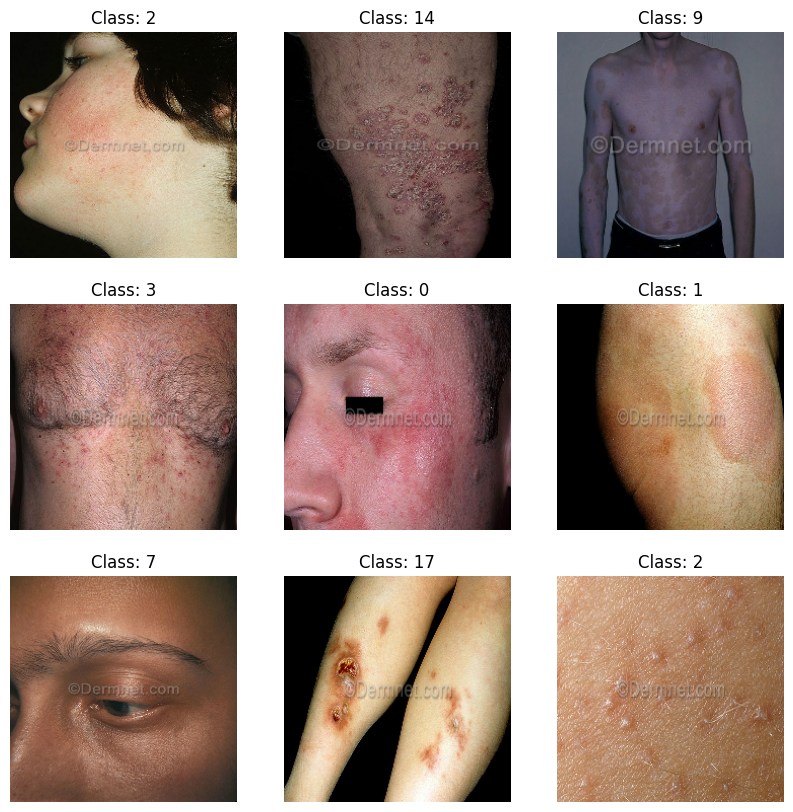

In [23]:
import matplotlib.pyplot as plt
for images, labels in validation_dataset.take(1):
    # Display the first 9 images in the batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Class: {labels[i].numpy()}")
        plt.axis("off")

    plt.show()

In [ ]:
base_model = ResNet101(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Create the model for fine-tuning
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(23, activation='softmax')  # Assuming 23 classes
])

# Compile the model
model.compile(optimizer=Adam(lr=0.2), loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

# Print model summary
model.summary()

# Fine-tune the model
epochs = 40# You can adjust the number of epochs
history = model.fit(norTrain, epochs=epochs, validation_data=norTest)

In [ ]:
model.fit(train, epochs=20, validation_data=test)

In [ ]:
model.fit(train, epochs=20, validation_data=test)

In [ ]:
model.fit(train, epochs=20, validation_data=test)

In [64]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2

# Define DenseNet Model
def create_densenet_model(input_shape, num_classes, dropout_rate=0.5, l2_regularization=0.04):
    # Load pre-trained DenseNet model
    base_model = tf.keras.applications.DenseNet121(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )

    # Freeze the pre-trained layers
    base_model.trainable = True

    # Create the final model by adding custom dense layers on top
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu', kernel_regularizer=l2(l2_regularization)),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation='relu', kernel_regularizer=l2(l2_regularization)),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Example usage:
# Specify the input shape (height, width, channels) and the number of classes
input_shape = (224, 224, 3)  # Adjust this according to your images
num_classes = 23  # Change this according to your task

# Create an instance of the DenseNet model with regularization
model = create_densenet_model(input_shape, num_classes, dropout_rate=0.5, l2_regularization=0.005)

# Print the model summary
model.summary()

# Compile the model with a suitable optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.SGD(learning_rate=0.05)
model.compile(optimizer=optimizer, 
              loss=SparseCategoricalCrossentropy(from_logits=False),  # Use sparse categorical crossentropy
              metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d_3  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                      

In [66]:
model.reset_states()

In [65]:
model.fit(training_dataset,validation_data=validation_dataset,epochs=50)

Epoch 1/50
185/185 [==============================] - 116s 424ms/step - loss: 7.5354 - accuracy: 0.1657 - val_loss: 6.9080 - val_accuracy: 0.2127
Epoch 2/50
185/185 [==============================] - 86s 411ms/step - loss: 6.4206 - accuracy: 0.2630 - val_loss: 5.9262 - val_accuracy: 0.3071
Epoch 3/50
185/185 [==============================] - 86s 413ms/step - loss: 5.5510 - accuracy: 0.3282 - val_loss: 5.3231 - val_accuracy: 0.3064
Epoch 4/50
185/185 [==============================] - 87s 415ms/step - loss: 4.8201 - accuracy: 0.3844 - val_loss: 4.8633 - val_accuracy: 0.3094
Epoch 5/50
185/185 [==============================] - 86s 412ms/step - loss: 4.1957 - accuracy: 0.4364 - val_loss: 4.2389 - val_accuracy: 0.3791
Epoch 6/50
185/185 [==============================] - 86s 413ms/step - loss: 3.6932 - accuracy: 0.4823 - val_loss: 4.1688 - val_accuracy: 0.3411
Epoch 7/50
185/185 [==============================] - 86s 414ms/step - loss: 3.2422 - accuracy: 0.5251 - val_loss: 3.8818 - val_a

In [62]:
model.fit(training_dataset,validation_data=validation_dataset,epochs=1)

200/200 [==============================] - 91s 399ms/step - loss: 0.1893 - accuracy: 0.9673 - val_loss: 2.1064 - val_accuracy: 0.5851


In [60]:
model.save('model')

In [ ]:
for images, labels in validation_dataset.take(8):
    for i in range(len(images)):
        print("prdicted : " ,np.argmax(model.predict(np.expand_dims(images[i],axis=0))), "actual",labels[i])

In [61]:
!zip -r sfinal.zip /kaggle/working/model

  adding: kaggle/working/model/ (stored 0%)
  adding: kaggle/working/model/assets/ (stored 0%)
  adding: kaggle/working/model/saved_model.pb (deflated 92%)
  adding: kaggle/working/model/keras_metadata.pb (deflated 96%)
  adding: kaggle/working/model/variables/ (stored 0%)
  adding: kaggle/working/model/variables/variables.index (deflated 78%)
  adding: kaggle/working/model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: kaggle/working/model/fingerprint.pb (stored 0%)
